### Regularized Linear Regression Task
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.


In [1]:
import pandas as pd

d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
d_df = d_df.drop(labels=['Unnamed: 0'], axis=1)
d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
pre_d_df = d_df.copy()

In [5]:
pre_d_df.duplicated().sum()

149

In [6]:
pre_d_df = pre_d_df.drop_duplicates().reset_index(drop=True)
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
from sklearn.preprocessing import LabelEncoder

columns = ['cut', 'color', 'clarity']

label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_d_df[column])
    label_encoders[column] = encoder.classes_
    pre_d_df[column] = result

label_encoders

{'cut': array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 'color': array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 'clarity': array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)}

In [8]:
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
pre_d_df.loc[:, 'target'] = pre_d_df.price
pre_d_df.drop(labels=['price'], axis=1, inplace=True)

In [10]:
pre_d_df

,carat,cut,color,clarity,depth,table,x,y,z,target
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53790,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53791,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53792,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


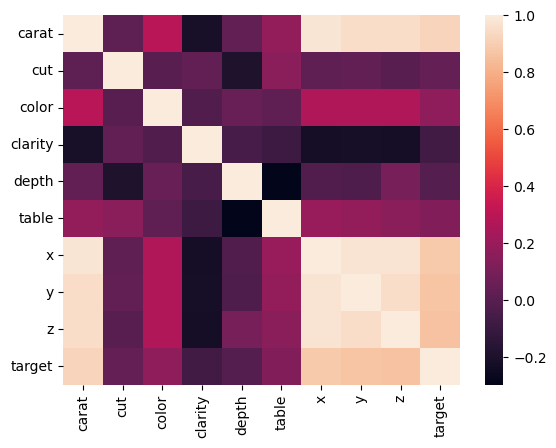

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pre_d_df.corr())
plt.show()

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'color'}>],
       [<Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

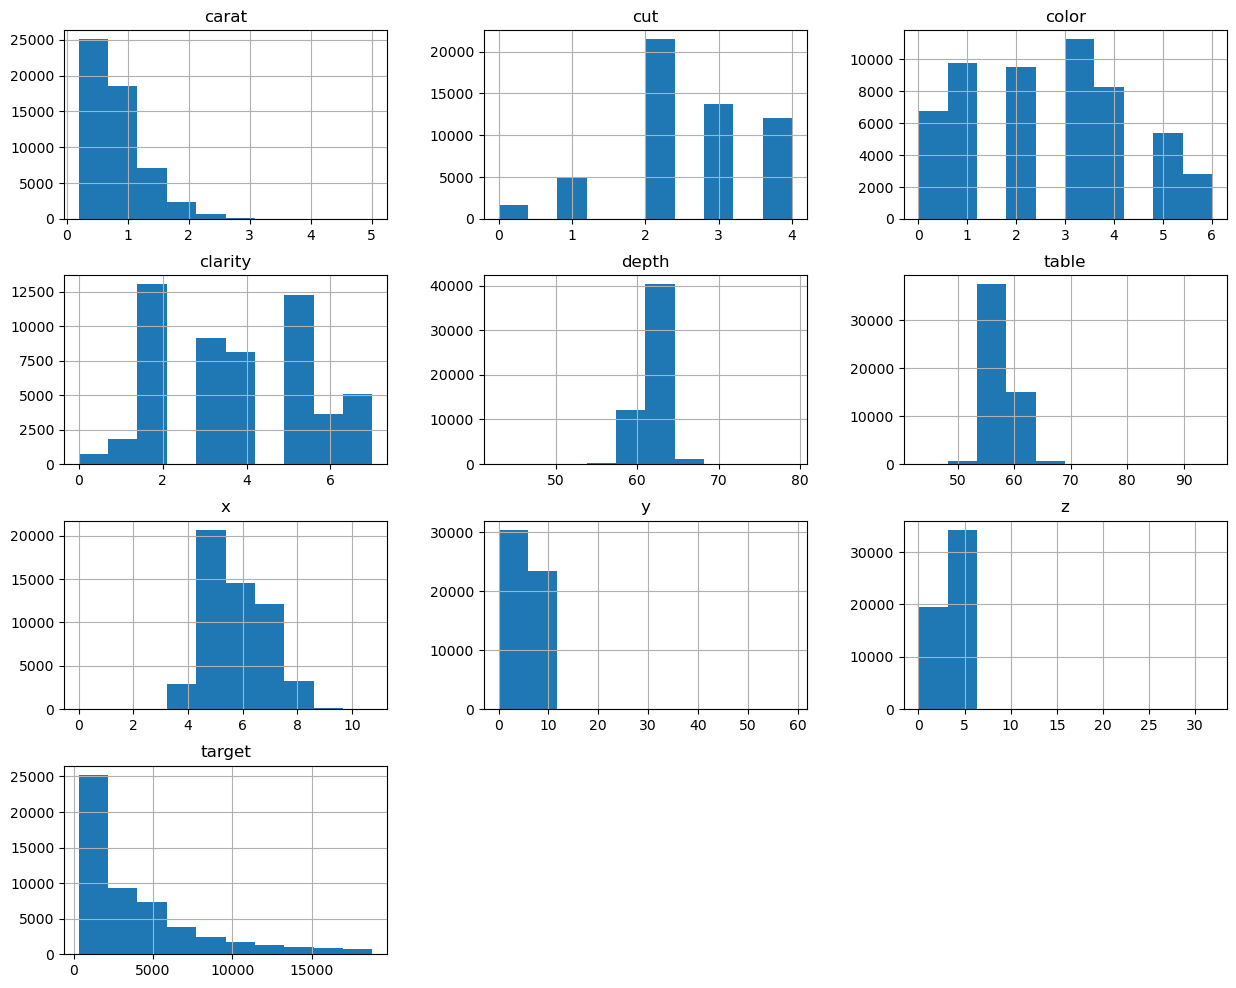

In [12]:
pre_d_df.hist(figsize=(15,12))

In [13]:
from statsmodels.api import OLS

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          9.386e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):                        0.00
Time:                        13:32:03   Log-Likelihood:                     -4.6488e+05
No. Observations:               53794   AIC:                                  9.298e+05
Df Residuals:                   53785   BIC:                                  9.299e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [15]:
get_vif(features)

,vif_score,feature
0,72.159900,carat
1,7.456760,cut
2,3.655482,color
3,6.215990,clarity
4,533.391692,depth
5,521.507212,table
6,1289.198837,x
7,530.380655,y
8,541.329225,z


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    #MSLE = mean_squared_log_error(y_test, prediction)
    #RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation_msle(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [21]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1707158.8195, RMSE: 1306.5829, R2: 0.8913


<Axes: >

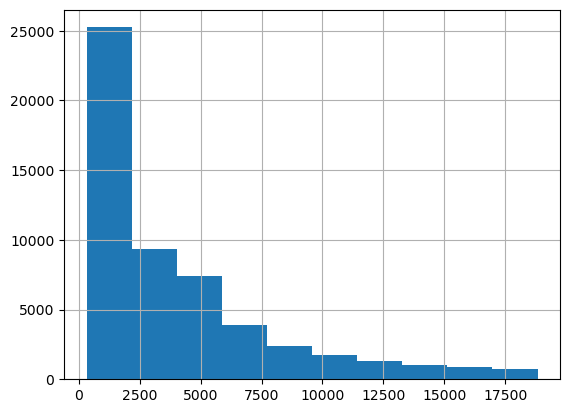

In [22]:
pre_d_df.target.hist()

<Axes: >

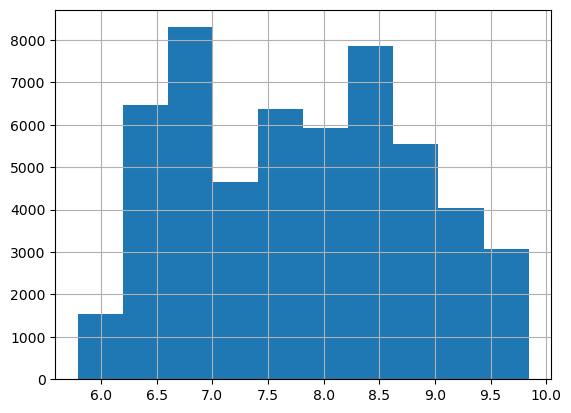

In [23]:
np.log1p(pre_d_df.target).hist()

In [24]:
pre_d_df['target'] = np.log1p(pre_d_df.target)

<Axes: >

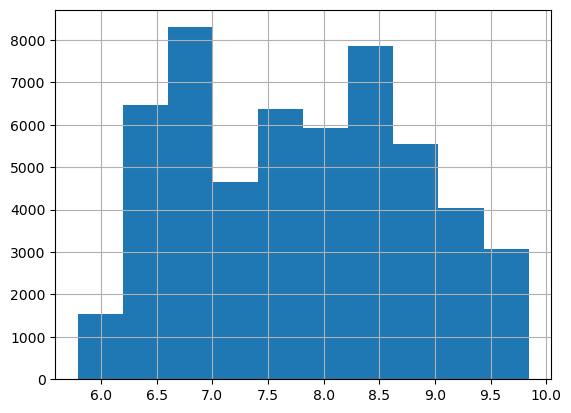

In [25]:
pre_d_df.target.hist()

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [27]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0464, RMSE: 0.2154, R2: 0.9548


In [28]:
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.707e+06
Date:                Wed, 08 May 2024   Prob (F-statistic):                        0.00
Time:                        13:35:29   Log-Likelihood:                          1726.1
No. Observations:               53794   AIC:                                     -3434.
Df Residuals:                   53785   BIC:                                     -3354.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
get_vif(features)

,vif_score,feature
0,72.159900,carat
1,7.456760,cut
2,3.655482,color
3,6.215990,clarity
4,533.391692,depth
5,521.507212,table
6,1289.198837,x
7,530.380655,y
8,541.329225,z


In [34]:
get_vif(features.drop(labels=['x','y','z','table'], axis=1))

,vif_score,feature
0,4.398297,carat
1,7.021022,cut
2,3.643018,color
3,6.195094,clarity
4,16.927030,depth


In [35]:
pre_d_df1 = pre_d_df.drop(labels=['x','y','z','table'], axis=1)
pre_d_df1

,carat,cut,color,clarity,depth,target
0,0.23,2,1,3,61.5,5.789960
1,0.21,3,1,2,59.8,5.789960
2,0.23,1,1,4,56.9,5.793014
3,0.29,3,5,5,62.4,5.814131
4,0.31,1,6,3,63.3,5.817111
...,...,...,...,...,...,...
53789,0.72,2,0,2,60.8,7.922261
53790,0.72,1,0,2,63.1,7.922261
53791,0.70,4,0,2,62.8,7.922261
53792,0.86,3,4,3,61.0,7.922261


In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_d_df1.iloc[:, :-1], pre_d_df1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [38]:
prediction = l_r.predict(X_test)
get_evaluation_msle(y_test, prediction)

MSE: 0.1305, RMSE: 0.3613, MSLE: 0.0016, RMSLE: 0.0402, R2: 0.8727


In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_d_df1.iloc[:, :-1], pre_d_df1.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [40]:
prediction = l_r.predict(X_test)
get_evaluation_msle(y_test, prediction)

MSE: 0.0319, RMSE: 0.1786, MSLE: 0.0004, RMSLE: 0.0207, R2: 0.9689


In [43]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_d_df1.iloc[:, :-1], pre_d_df1.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

lasso = Lasso(alpha=10, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=10, max_iter=10000)

In [44]:
prediction = lasso.predict(X_test)
get_evaluation_msle(y_test, prediction)

MSE: 0.1318, RMSE: 0.3631, MSLE: 0.0016, RMSLE: 0.0406, R2: 0.8714


In [49]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_d_df1.iloc[:, :-1], pre_d_df1.iloc[:, -1]

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

ridge = Ridge(alpha=1000, max_iter=30000)
ridge.fit(X_train, y_train)

Ridge(alpha=1000, max_iter=30000)

In [50]:
prediction = ridge.predict(X_test)
get_evaluation_msle(y_test, prediction)

MSE: 0.0325, RMSE: 0.1802, MSLE: 0.0004, RMSLE: 0.0209, R2: 0.9683
